**bold text**# **3.3 MATPLOTLIB**
- Matplotlib is a powerful Python package created by John. D. Hunter in 2003 for the task of data visualization.
- It is an open-source and cross-platform plotting library for implementing 2D graphics across Python and various interactive environments such as IPython, Jupyter notebooks, etc.
- The most commonly used module of matplotlib is pyplot which has a set of functions that is modeled similarly to MATLAB.
- Despite its analogy to the MATLAB commands, all the plotting commands in pyplot are written in Python and NumPy.




## **MATPLOTLIB INSTALLATION**

In [1]:
import matplotlib
print(matplotlib.__version__) #outputs the version of Matplotlib.

3.9.1.post1


In [2]:

import matplotlib.pyplot as plt


In [3]:
import numpy as np

class Data:
    def __init__(self, N, sigma):
        self.N=N #Number of data per cluster.
        self.sigma=sigma #standard deviation of the clusters.

    def data_xor(self, classes):
        X=self.sigma*np.random.randn(2,4*self.N) # Generate 4*N random vectors (gaussian) centered around zero
        mean=np.array([[-1,-1, 1, 1],[-1,1,-1,1]]) # define four means
        M=np.ones((self.N,2))*mean[:,0] # Means of the first cluster
        y=np.ones((1,self.N))*classes[0] # Labels of the first cluster
        for i in range(1,4):
            m=np.ones((self.N,2))*mean[:,i] # Means of cluster i
            M=np.concatenate((M,m))     #Concatenate all means
            y=np.concatenate((y,np.ones((1,self.N))*classes[i]),axis=1) # concatenate labels
        M=M.T
        X=X+M # Add means to the data.
        return X,y

    def data_circle(self):
        theta=np.random.rand(1,self.N)*np.pi*2
        rho=np.random.randn(1,self.N)*self.sigma+1
        X1=rho*np.block([[np.cos(theta)],[np.sin(theta)]]) #circular data corresponding to class 1

        theta=np.random.rand(1,self.N)*2*np.pi
        rho=np.random.randn(1,self.N)*self.sigma+0.8
        X2=rho*np.block([[np.cos(theta)],[np.sin(theta)]])

        y=np.concatenate((0*np.ones((1,self.N)),np.ones((1,self.N))),axis=1) # labels
        X=np.concatenate((X1,X2),axis=1)
        return X,y
#The class definition ends here.

In [4]:
np.random.seed(30) #allows to reproduce the same results.
N=100; sigma=0.6 #attributes for xor.
classes=[0,1,1,0] #attribute for xor.
T=Data(N,sigma) #define the object corresponding to xor data.
X,y=T.data_xor(classes) #method with instance variable classes.
print(X.shape,y.shape)

(2, 400) (1, 400)


## **3.3.1 PLOTTING**
### **Functional method**
- The first method is to directly use plt.plot command as shown below.
- Note that while using this method we need to add the plt.show() command to display the plots.
- The plt.plot has several additional attributes such as color, markers,.etc.
- plt.plot(x,y,colors) can be used directly for plotting the data.
- Further, additional commands such as plt.title, plt.legend, plt.xlabel and plt.ylabel can also be added to label the figure and the axes.

<>:20: SyntaxWarning: invalid escape sequence '\d'
<>:20: SyntaxWarning: invalid escape sequence '\d'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\2295802930.py:20: SyntaxWarning: invalid escape sequence '\d'
  plt.savefig("Data\data_xor.pdf") #save the figure


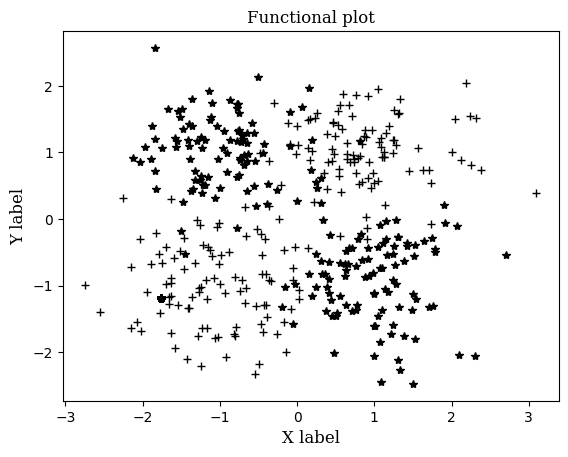

In [5]:
#EXAMPLE 1
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(30) #allows to reproduce the same results
N=100; sigma=0.6 #attributes for xor
classes=[0,1,1,0] #attribute for xor
T=Data(N,sigma) #define the object corresponding to xor data
X,y=T.data_xor(classes) #method with instance variable classes

plt.figure() #Create a new figure.
indexn=np.where(y==0) #get the index corresponding to class 0
indexp=np.where(y==1) #get index corresponding to class 1
plt.plot(X[0,indexp], X[1,indexp], 'k*') #plot the data of class 0
plt.plot(X[0,indexn], X[1,indexn], 'k+') #plot the data of class 1
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X label",fontsize=12,**csfont) #Set the x-axis label of the current axes
plt.ylabel("Y label",fontsize=12,**csfont) #Set the y-axis label of the current axes
plt.title("Functional plot",fontsize=12,**csfont) #Set a title of the current axes
plt.savefig("Data\data_xor.pdf") #save the figure
plt.show() #Display a figure


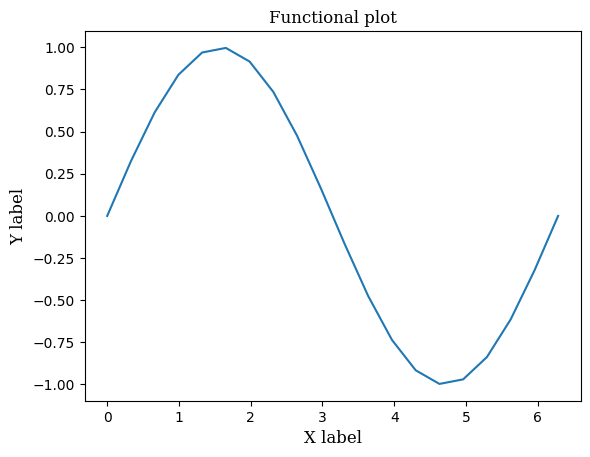

In [6]:
#EXAMPLE 2
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,2*np.pi,20) #Create evenly spaced numbers over a specified interval
y = np.sin(x) #Find the sine value of array x
plt.figure() #Create a new figure
plt.plot(x,y) #plot x and y
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X label",fontsize=12,**csfont) #Set the x-axis label of the current axes
plt.ylabel("Y label",fontsize=12,**csfont) #Set the y-axis label of the current axes
plt.title("Functional plot",fontsize=12,**csfont) #Set a title of the current axes
plt.show() #Display a figure.


### **Object oriented method**
- Second method is to indirectly use the plt command by first specifying the figure method and then adding axes using the figure method add_axes.
- Further, the set_ commands are used to set the xlabel, ylabel and title of the plot.

Text(0.5, 1.0, 'Object Oriented Plot')

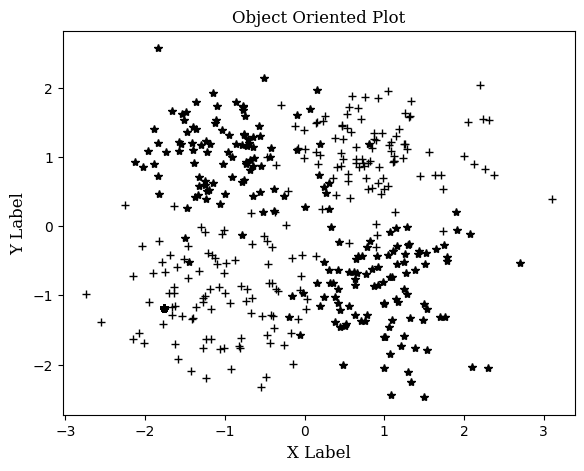

In [7]:
#EXAMPLE 1
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(30) #allows to reproduce the same results
N=100; sigma=0.6 #attributes for xor
classes=[0,1,1,0] #attribute for xor
T=Data(N,sigma) #define the object corresponding to xor data
X,y=T.data_xor(classes) #method with instance variable classes

fig = plt.figure() #create a new figure.
#add_axes contains a list [x0, y0, width, height]
# The list denotes the lower left point of the new axes in figure coodinates (x0,y0) and its width and height
axes = fig.add_axes([0.1,0.1,0.8,0.8])
indexn=np.where(y==0) #get the index corresponding to class 0
indexp=np.where(y==1) #get index corresponding to class 1
axes.plot(X[0,indexp], X[1,indexp], 'k*') #plot the data of class 0
axes.plot(X[0,indexn], X[1,indexn], 'k+') #plot the data of class 1
csfont = {'fontname':'serif'} #define the font family
axes.set_xlabel("X Label",fontsize=12,**csfont) #Set the x-axis label of the current axes
axes.set_ylabel("Y Label",fontsize=12,**csfont) #Set the y-axis label of the current axes
axes.set_title("Object Oriented Plot",fontsize=12,**csfont) #Set the title of the current axes


Text(0.5, 1.0, 'Object Oriented Plot')

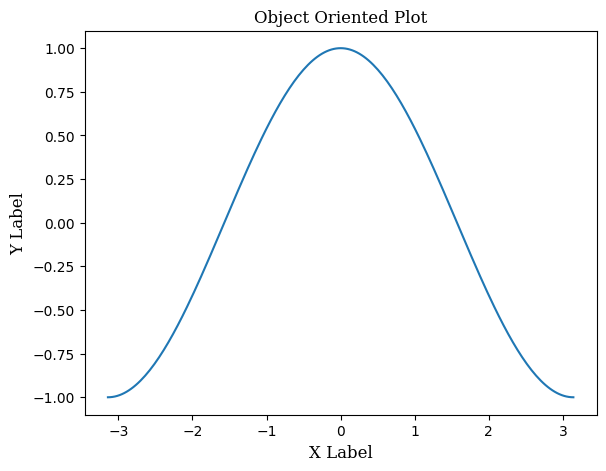

In [8]:
#EXAMPLE 2
import matplotlib.pyplot as plt
import numpy as np
x1 = np.linspace(-np.pi, np.pi, 201) #Create evenly spaced numbers over a specified interval
y1 = np.cos(x1) #Find the cosine value of array x1
fig = plt.figure() #create a new figure
#add_axes contains a list [x0, y0, width, height]
# The list denotes the lower left point of the new axes in figure coodinates (x0,y0) and its width and height
axes = fig.add_axes([0.1,0.1,0.8,0.8])
axes.plot(x1,y1) #Plot x and y
csfont = {'fontname':'serif'} #define the font family
axes.set_xlabel("X Label",fontsize=12,**csfont) #Set the x-axis label of the current axes
axes.set_ylabel("Y Label",fontsize=12,**csfont) #Set the y-axis label of the current axes
axes.set_title("Object Oriented Plot",fontsize=12,**csfont) #Set the title of the current axes


## **3.3.2 CUSTOMIZED PLOTTING**

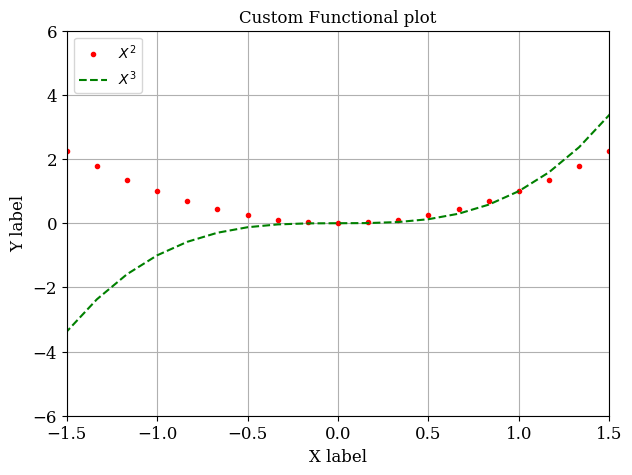

In [9]:
import matplotlib.pyplot as plt
import numpy as np
a = np.linspace(-2,2,25) #Create evenly spaced numbers over a specified interval
b1 = a**2 #Compute square of variabe 'a'
b2 = a**3 #Compute cube of variable 'a'
#Create a new figure of height and width 7x5 inches and dpi(number of pixels in the figuer)=150
plt.figure(figsize=(7,5),dpi=100)
plt.plot(a,b1,'r.') #plot x and y with color code red and dotted linestyle
plt.plot(a,b2,'g--') #plot x and y with color code green and dashed linestyle
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X label",fontsize=12,**csfont) #Set the x-axis label with font size=12
plt.xticks(fontsize=12,**csfont) #Set the font size of the x-axis tick labels
plt.ylabel("Y label",fontsize=12,**csfont) #Set the y-axis label with font size=12
plt.yticks(fontsize=12,**csfont) #Set the font size of the y-axis tick labels
plt.legend(labels = ('$X^2$','$X^3$'), loc = 'upper left') #legend placed at upper left
plt.xlim([-1.5, 1.5]) #Set the x limit
plt.ylim([-6, 6]) #Set the y limit
plt.grid(True) #Configure the grid lines for the plot
plt.title("Custom Functional plot",fontsize=12,**csfont) #Set the title with fontsize=12
#plt.savefig('\data\square_and_cube.png') #Save the figure
plt.show() #Display a figure

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3315251041.py:23: SyntaxWarning: invalid escape sequence '\l'
  ax.figure.savefig('Data\linear.pdf') #Save the figure
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3315251041.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x2,fontsize=12,**csfont) #Sets the xticklabels and its font size.
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3315251041.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(x3,fontsize=12,**csfont) #Sets the yticklabels and its font size.


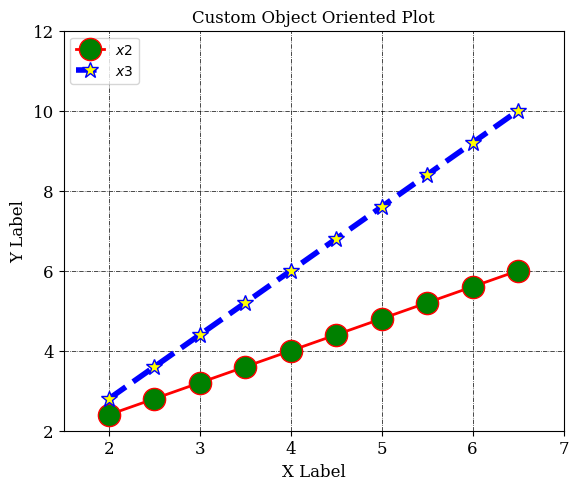

In [10]:
import matplotlib.pyplot as plt
import numpy as np
x2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x3 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
fig = plt.figure(figsize=(5,4),dpi=100)
#add_axes contains a list [x0, y0, width, height]
ax = fig.add_axes([0,0,1,1])
#plots function with different properties
ax.plot(x2,label = '$x2$',color='r',marker='o',
        markerfacecolor='green',markersize=16,linestyle='solid',linewidth=2)
ax.plot(x3,label = '$x3$',color='b',marker='*',
        markerfacecolor='yellow',markersize=12,linestyle='dashed',linewidth=4)
csfont = {'fontname':'serif'} #define the font family
ax.set_xticklabels(x2,fontsize=12,**csfont) #Sets the xticklabels and its font size.
ax.set_yticklabels(x3,fontsize=12,**csfont) #Sets the yticklabels and its font size.
ax.set_xlabel("X Label",fontsize=12,**csfont) #Sets the x-axis label with font size=12
ax.set_ylabel("Y Label",fontsize=12,**csfont) #Sets the y-axis label with font size=12
ax.set_xlim(-1,10) #Sets the x limit
ax.set_ylim(0,25) #Sets the y limit
ax.grid(color='k', ls = '-.', lw = 0.5) #Add color, linestyle and linewidth to the grid function
ax.legend(loc =2) #Sets the location of the legend to upper left
ax.set_title("Custom Object Oriented Plot",fontsize=12,**csfont) #Set the title with font size=12
ax.figure.savefig('Data\linear.pdf') #Save the figure

# Example 3.4.2
In this example, we demonstrate how to create multiple plots in one figure:

<>:27: SyntaxWarning: invalid escape sequence '\S'
<>:27: SyntaxWarning: invalid escape sequence '\S'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\2059734648.py:27: SyntaxWarning: invalid escape sequence '\S'
  plt.savefig('Data\Subplot.pdf') #Save the figure.


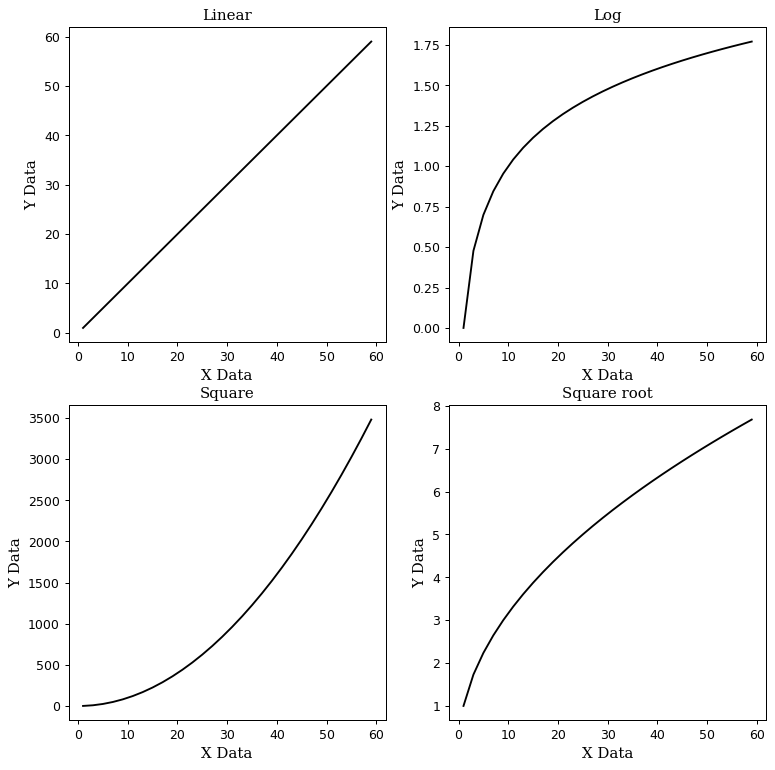

In [11]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1,60,2) #create an array.
plt.figure(figsize=(10,10),dpi=90)
csfont = {'fontname':'serif'} #define the font family
plt.subplot(2, 2, 1) #subplot function defining the rows, columns and index.
plt.plot(x,x,'k') #plot x and y.
plt.title("Linear",fontsize=12,**csfont) #define the title.
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.subplot(2, 2, 2) #subplot function defining the rows, columns and index.
plt.plot(x,np.log10(x),'k') #plot x and y.
plt.title("Log",fontsize=12,**csfont) #define the title.
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.subplot(2, 2, 3) #subplot function defining the rows, columns and index.
plt.plot(x,x**2,'k') #plot x and y.
plt.title("Square",fontsize=12,**csfont) #define the title.
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.subplot(2, 2, 4) #subplot function defining the rows, columns and index.
plt.plot(x,np.sqrt(x),'k') #plot x and y.
plt.title("Square root",fontsize=12,**csfont) #define the title.
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.savefig('Data\Subplot.pdf') #Save the figure.
plt.show()

## **3.4.3 TWO-DIMENSIONAL PLOTTING**
### **Bar plot**

<>:25: SyntaxWarning: invalid escape sequence '\p'
<>:25: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\1682631341.py:25: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('Data\plot_bar.pdf') #Save the figure.


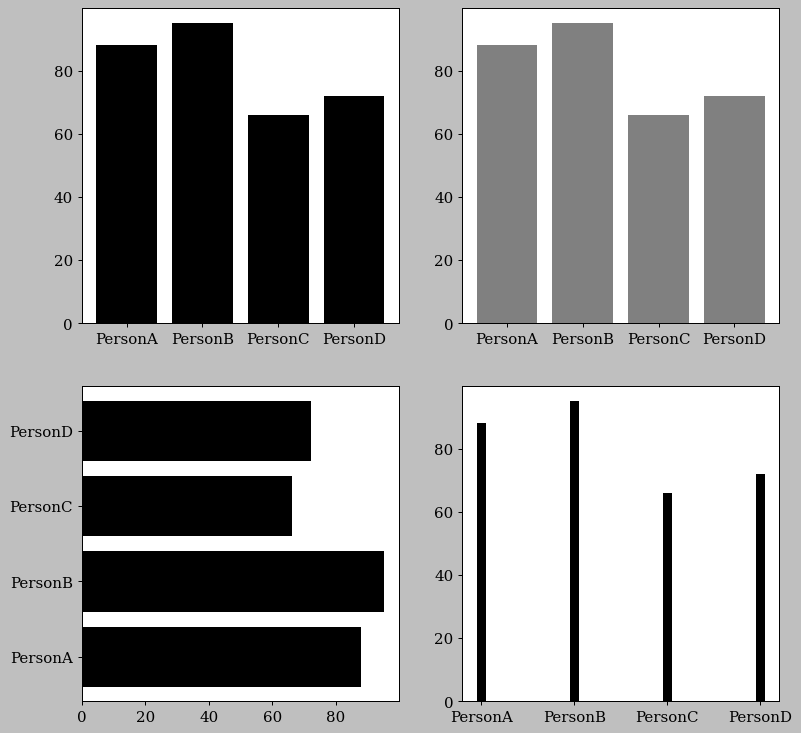

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["PersonA", "PersonB", "PersonC", "PersonD"])
y = np.array([88, 95, 66, 72])
plt.style.use('grayscale')
plt.figure(figsize=(10,10),dpi=90)
csfont = {'fontname':'serif'} #define the font family
plt.subplot(2, 2, 1)
plt.bar(x,y) #plot the bar graph
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.subplot(2, 2, 2)
plt.bar(x, y, color = "grey") #plot the bar graph with a specific color
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.subplot(2, 2, 3)
plt.barh(x, y) #plot the bar graph horizontally
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.subplot(2, 2, 4)
plt.bar(x, y, width = 0.1) #plot the bar graph with a specific width
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\plot_bar.pdf') #Save the figure.
plt.show()

### **Histogram**

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3028374443.py:13: SyntaxWarning: invalid escape sequence '\h'
  plt.savefig('Data\hist.pdf') #Save the figure.


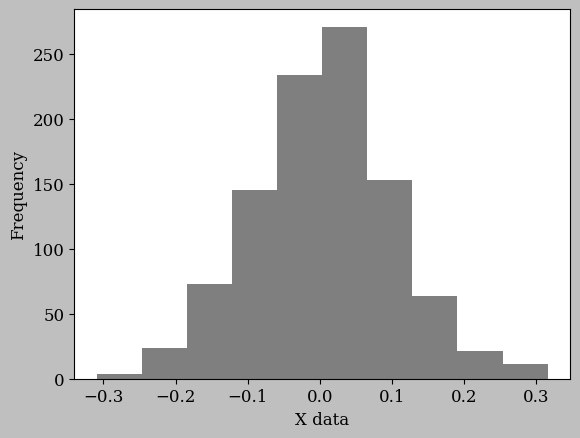

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#draw random samples from a normal distribution with mean,standard deviation and size of the output array.
x = np.random.normal(0,0.1,1000)
num_bins = 10
#histogram with specific bin size, face color and alpha.
n, bins, patches = plt.hist(x, num_bins, facecolor='black', alpha=0.5)
csfont = {'fontname':'serif'} #define the font family
plt.xlabel('X data',fontsize=12,**csfont)
plt.ylabel('Frequency',fontsize=12,**csfont)
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\hist.pdf') #Save the figure.
plt.show()

### **Pie Plot**

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\2226303306.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('Data\pie.pdf') #Save the figure.


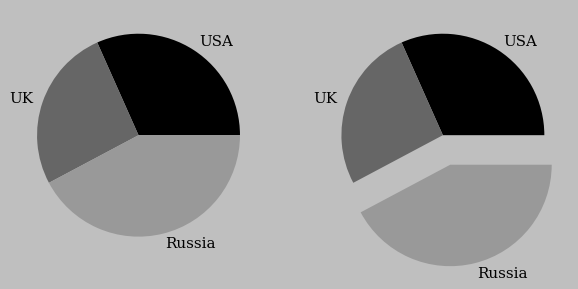

In [14]:
import matplotlib.pyplot as plt
import numpy as np
a = np.array([900, 742, 1200])
b = ["USA", "UK", "Russia"]
ep = [0, 0, 0.3]
plt.figure(figsize=(8,8),dpi=90)
plt.subplot(1, 2, 1)
plt.pie(a, labels = b, textprops={"fontsize":12,"family":"serif"}) #pie plot with label parameter.
plt.subplot(1, 2, 2)
#pie plot with explode parameter that makes the specified wedge to stand out.
plt.pie(a, labels = b, explode = ep, textprops={"fontsize":12,"family":"serif"})
plt.savefig('Data\pie.pdf') #Save the figure.
plt.show()


### **Scatter Plot**

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\2722697960.py:11: SyntaxWarning: invalid escape sequence '\s'
  plt.savefig('Data\scatter.pdf') #Save the figure.


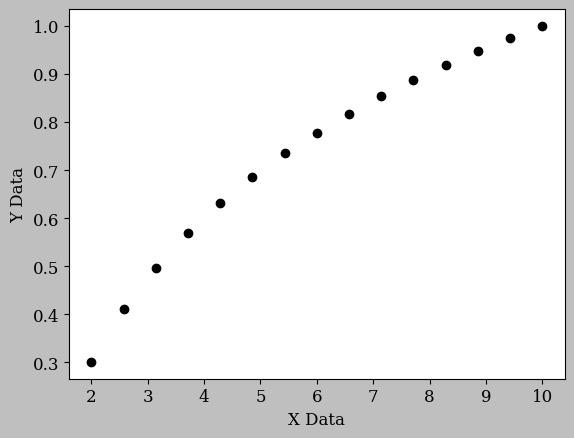

In [15]:
import matplotlib.pyplot as plt
import numpy as np
p = np.linspace(2,10,15)
q = np.log10(p)
plt.scatter(p,q, color='k') #Scatter plot with a defined color.
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\scatter.pdf') #Save the figure.
plt.show()

### **Box Plot**

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\1267807271.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('Data\plot_box.pdf') #Save the figure.


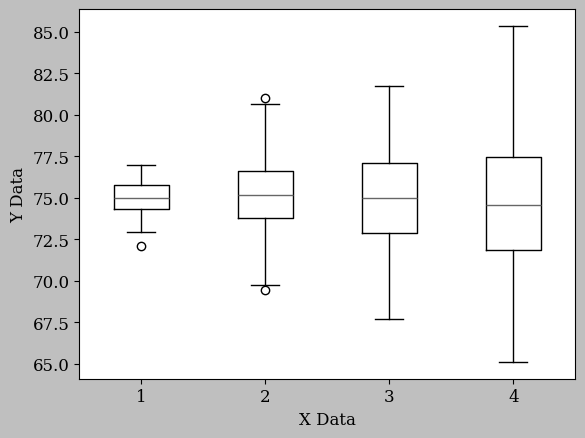

In [16]:
import matplotlib.pyplot as plt
import numpy as np
#create a list of normal distributions with varying standard deviation.
x1 = [np.random.normal(75, std, 200) for std in range(1,5)]
#displays the minimum, median and maximum using the box plot.
plt.boxplot(x1)
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\plot_box.pdf') #Save the figure.
plt.show()

### **Quiver Plot**

<>:16: SyntaxWarning: invalid escape sequence '\q'
<>:16: SyntaxWarning: invalid escape sequence '\q'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3588407100.py:16: SyntaxWarning: invalid escape sequence '\q'
  plt.savefig('Data\quiver.pdf') #Save the figure.


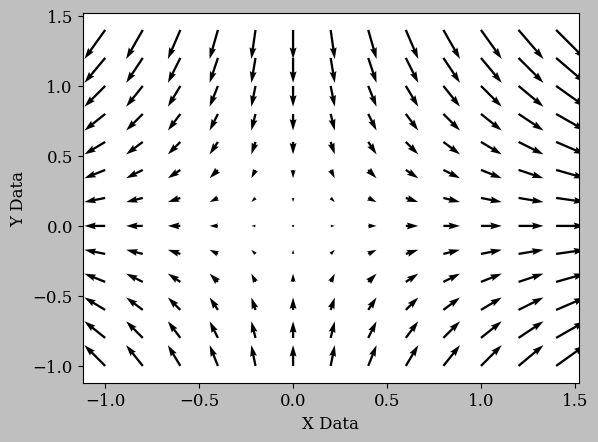

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(-1, 1.6, 0.2)
y = np.arange(-1, 1.6, 0.2)
#Define a rectangular grid out of two given one-dimensional arrays.
X, Y = np.meshgrid(x, y)
U, V = X/5, -Y/5
#Quiver plot with X and Y as the starting positions of the arrows
#U and V are the directions of the arrow.
plt.quiver(X, Y, U, V)
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\quiver.pdf') #Save the figure.
plt.show()

### **Contour Plot**

<>:15: SyntaxWarning: invalid escape sequence '\c'
<>:15: SyntaxWarning: invalid escape sequence '\c'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\2220722039.py:15: SyntaxWarning: invalid escape sequence '\c'
  plt.savefig('Data\contour.pdf') #Save the figure.


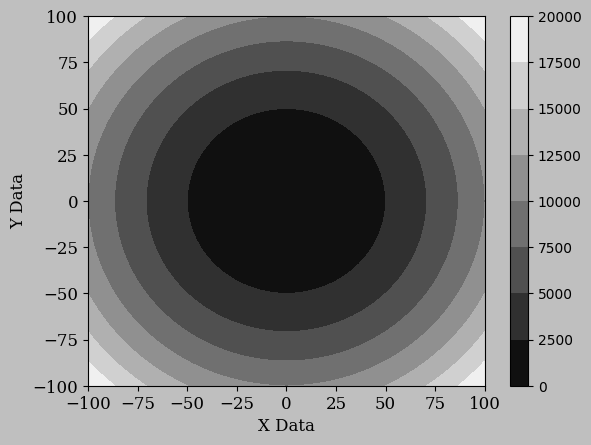

In [18]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-100, 100, 2000)
y = np.linspace(-100, 100, 2000)
#Define a rectangular grid out of two given one-dimensional arrays.
X, Y = np.meshgrid(x,y)
Z = X**2+Y**2
plt.contourf(X, Y, Z) #Creates a filled contour plot.
plt.colorbar() #Add a colorbar to the plot.
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\contour.pdf') #Save the figure.
plt.show()

### **Violin Plot**

<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3822651788.py:12: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('Data\plot_violin.pdf') #Save the figure.


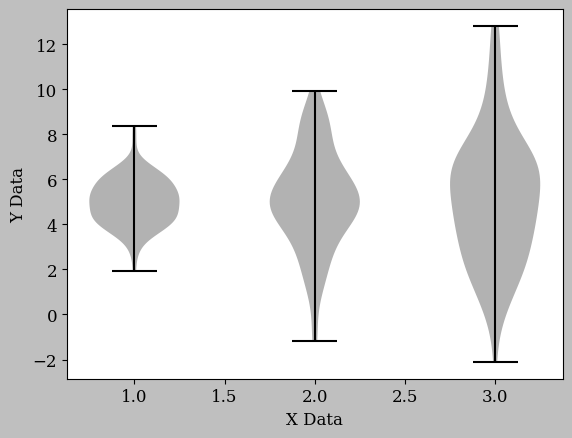

In [19]:
import matplotlib.pyplot as plt
import numpy as np
#create a list of normal distributions with varying standard deviation.
xx = [np.random.normal(5, std, 100) for std in range(1,4)]
#displays the distribution of the data using the violin plot.
plt.violinplot(xx)
csfont = {'fontname':'serif'} #define the font family
plt.xlabel("X Data",fontsize=12,**csfont) #define the x label.
plt.ylabel("Y Data",fontsize=12,**csfont) #define the y label.
plt.xticks(fontsize=12,**csfont)
plt.yticks(fontsize=12,**csfont)
plt.savefig('Data\plot_violin.pdf') #Save the figure.
plt.show()

## **3.4.4 THREE-DIMENSIONAL PLOTTING**
### **3D Contour Plot**

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\1076759337.py:21: SyntaxWarning: invalid escape sequence '\p'
  ax.figure.savefig('Data\plot_3dcontour.pdf')


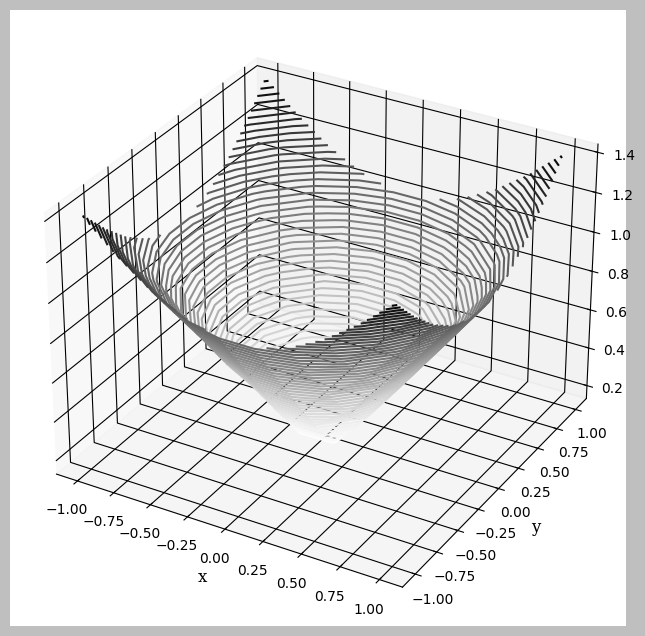

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d #Importing the mplot3d toolkit to enable 3d plots.
x_a = np.linspace(-1, 1, 10)
y_b = np.linspace(-1, 1, 10)
#Define a rectangular grid out of two given one-dimensional arrays.
X, Y = np.meshgrid(x_a, y_b)
Z = np.sqrt(X ** 2 + Y ** 2)
fig = plt.figure(figsize=(10,8))
csfont = {'fontname':'serif'} #define the font family
ax = plt.axes(projection='3d') #Creates a 3D axis.
#Creates the 3D contour plot with colormap viridis.
# Here 50 denotes the maximum number of samples used in each direction.
ax.contour3D(X, Y, Z, 50, cmap='Greys')
ax.set_xlabel('x',fontsize=12,**csfont) #labels the x-axis.
ax.set_ylabel('y',fontsize=12,**csfont) #labels the y-axis.
ax.set_zlabel('z',fontsize=12,**csfont) #labels the z-axis.
ax.xaxis.label.set_size(12) ## setting label size
ax.yaxis.label.set_size(12)
ax.zaxis.label.set_size(12)
ax.figure.savefig('Data\plot_3dcontour.pdf')

### **3D Surface Plot**

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\348055924.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.figure.savefig('Data\plot_3dsurface.pdf')


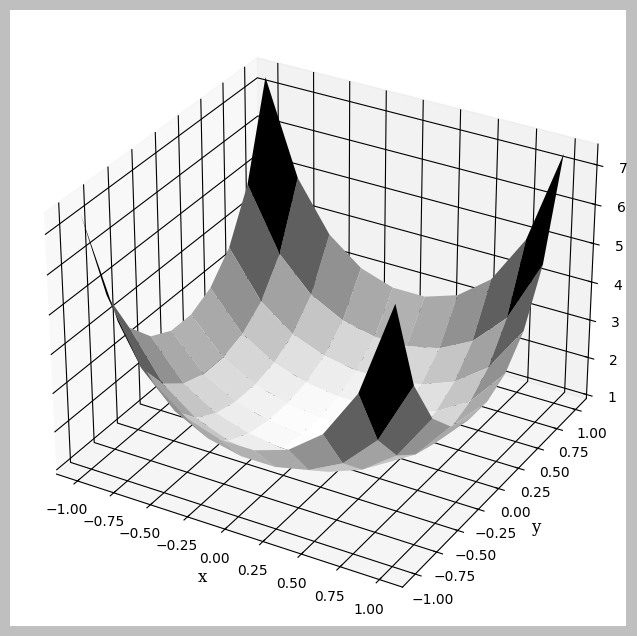

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d #Importing the mplot3d toolkit to enable 3d plots.
x_a = np.linspace(-1, 1, 10)
y_b = np.linspace(-1, 1, 10)
#Define a rectangular grid out of two given one-dimensional arrays.
X, Y = np.meshgrid(x_a, y_b)
Z = np.exp(X ** 2 + Y ** 2)
fig = plt.figure(figsize=(10,8))
csfont = {'fontname':'serif'} #define the font family
ax = plt.axes(projection='3d') #Creates a 3D axis.
#Creates the 3D surface plot with colormap binary.
ax.plot_surface(X, Y, Z, cmap='binary')
ax.set_xlabel('x',fontsize=12,**csfont) #labels the x-axis.
ax.set_ylabel('y',fontsize=12,**csfont) #labels the y-axis.
ax.set_zlabel('z',fontsize=12,**csfont) #labels the z-axis.
ax.xaxis.label.set_size(12) ## setting label size
ax.yaxis.label.set_size(12)
ax.zaxis.label.set_size(12)
ax.figure.savefig('Data\plot_3dsurface.pdf')

### **3D Wireframe Plot**

<>:20: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\p'
C:\Users\aswathyr\AppData\Local\Temp\ipykernel_36588\3158250919.py:20: SyntaxWarning: invalid escape sequence '\p'
  ax.figure.savefig('Data\plot_3dwireframe.pdf')


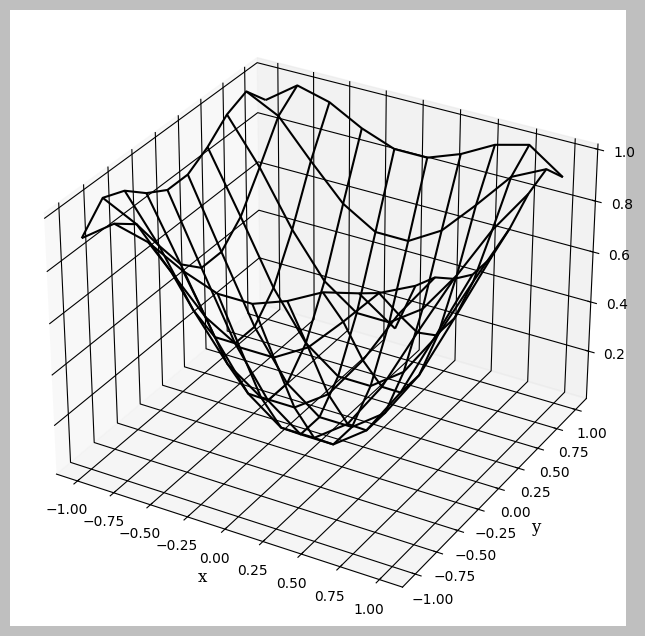

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d #Importing the mplot3d toolkit to enable 3d plots.
x_a = np.linspace(-1, 1, 10)
y_b = np.linspace(-1, 1, 10)
#Define a rectangular grid out of two given one-dimensional arrays.
X, Y = np.meshgrid(x_a, y_b)
Z = np.sin(X ** 2 + Y ** 2)
fig = plt.figure(figsize=(10,8))
csfont = {'fontname':'serif'} #define the font family
ax = plt.axes(projection='3d') #Creates a 3D axis.
#Creates the 3D wireframe plot with color black.
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_xlabel('x',fontsize=12,**csfont) #labels the x-axis.
ax.set_ylabel('y',fontsize=12,**csfont) #labels the y-axis.
ax.set_zlabel('z',fontsize=12,**csfont) #labels the z-axis.
ax.xaxis.label.set_size(12) ## setting label size
ax.yaxis.label.set_size(12)
ax.zaxis.label.set_size(12)
ax.figure.savefig('Data\plot_3dwireframe.pdf')